# Titanic Visualization

## Imports

In [2]:
import altair as alt
alt.enable_mime_rendering()

In [3]:
from seaborn.utils import load_dataset as lds

In [4]:
df = lds('titanic')

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Age, sex and class

Create a visualization to answer the following question:

> How do the age, sex and class affect whether the person survived?

Build your visualization using:

* Tick marks
* X -> age
* Y -> sex
* Color -> survived
* Row -> class

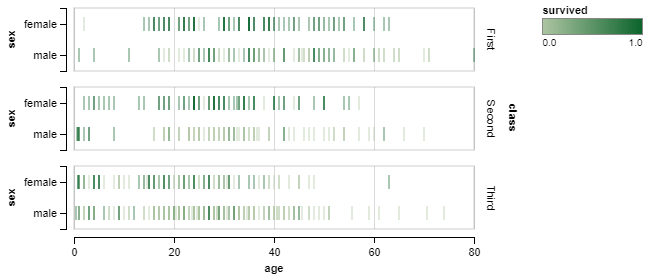

In [6]:
alt.Chart(df).mark_tick().encode(
    x='age',
    y='sex',
    color='survived',
    row='class'
)

# Age and fare

Create a visualization to answer the following question:

> Are there interesting patterns in the age, fare space related to a passenger surviving or not?

Build your visualization using:

* Point marks
* X -> age
* Y -> fare on a log scale
* Color -> survived on a scale with green for survived and red for not
* Row -> sex
* Size -> class on a scale with Third the smallest and First the largest

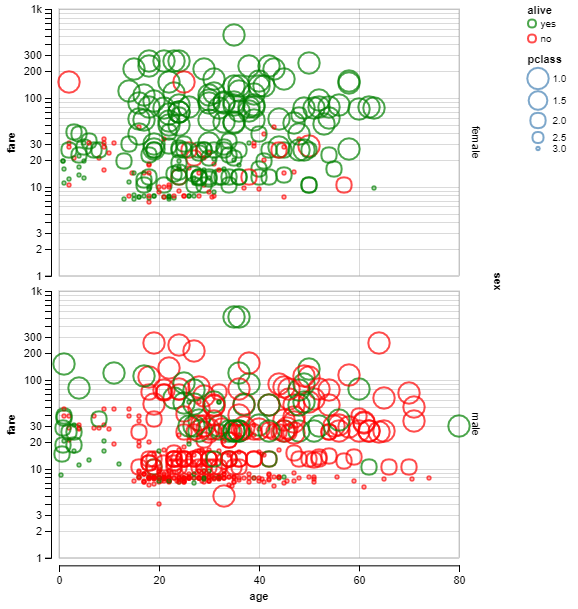

In [19]:
alt.Chart(df).mark_point().encode(
    x='age',
    y=alt.Y(field='fare',scale=alt.Scale(type='log')),
    color=alt.Color('alive',scale=alt.Scale(domain=['yes','no'],range=['green','red'])),
    row='sex',
    size=alt.Size(field='pclass',sort='descending')
)

# Fare distribution

Create a visualization to answer the following question:

> How does the fare distribution vary with geographic region?

Build your visualization using:

* Bar marks as a histogram
* X -> binned fare with at most 100 bins
* Y -> the number of records, with 3 labeled ticks and a title of `N`
* Row -> embark town, with a custom title of `Town`
* A custom cell size of height 60 and width 240

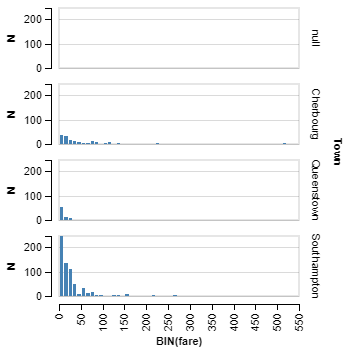

In [29]:
alt.Chart(df).mark_bar().encode(
    x=alt.X('fare',bin=alt.Bin(maxbins=100)),
    y=alt.Y('count(*)',axis=alt.Axis(ticks=3),title='N'),
    row=alt.Row(field='embark_town',title='Town')
).configure_cell(height=60,width=240)